#### Pandas高级处理
  - 缺失值处理
  -  数据离散化
  -  合并
  -  交叉表与透视表
  -  分组与聚合
  -  综合案例

In [2]:
import pandas as pd

#### 高级处理-缺失值处理
   1. 如何进行缺失值处理
      - 两种思路：
           1. 删除含有缺失值的样本
           2. 替换/插补
      - 如何处理nan
           1. 判断数据中是否存在NaN
               - pd.isnull(df)
               - pd.notnull(df)
           2. 删除含有缺失值的样本
               - df.dropna(inplace=False)
               -  替换/插补
               - df.fillna(value, inplace=False)
      - 不是缺失值nan，有默认标记的
               - 替换 ？-> np.nan
               - df.replace(to_replace="?", value=np.nan)
               - 处理np.nan缺失值的步骤
    2. 缺失值处理实例
    
![](./img/20221012144032.png)


In [4]:
movie=pd.read_csv("./IMDB/IMDB-Movie-Data.csv")

In [5]:
movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [6]:
import numpy as np

In [7]:
# 判断是否有缺失值nan
pd.isnull(movie)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,True,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
 # 返回True，说明数据中存在缺失值
np.any(pd.isnull(movie))

True

In [10]:
pd.isnull(movie)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,True,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,True,False


In [9]:
# 返回False，说明数据中存在缺失值
np.all(pd.notnull(movie))

False

In [11]:
pd.isnull(movie).any() # 找到有缺失值的列

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

In [12]:
pd.notnull(movie).all()

Rank                   True
Title                  True
Genre                  True
Description            True
Director               True
Actors                 True
Year                   True
Runtime (Minutes)      True
Rating                 True
Votes                  True
Revenue (Millions)    False
Metascore             False
dtype: bool

In [13]:
# 2）缺失值处理
# 方法1：删除含有缺失值的样本
data1 = movie.dropna()

In [14]:
data1

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [15]:
pd.notnull(data1).all() # 缺失值已经被处理了

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool

In [16]:
# 方法2：替换
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [17]:
# 含有缺失值的字段
# Revenue (Millions)    
# Metascore
movie["Revenue (Millions)"].fillna(movie["Revenue (Millions)"].mean(),inplace=True)
movie["Metascore"].fillna(movie["Metascore"].mean(),inplace=True)

In [19]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [21]:
pd.isnull(movie).all() # 缺失值已经被处理完毕

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)    False
Metascore             False
dtype: bool

#### 不是缺失值nan，有默认标记的

In [22]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
name = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

data=pd.read_csv(path,names=name) # 数据里面有些地方是 ？ 问号，不是nan缺失值  

In [29]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [27]:
# 1.替换
data_new=data.replace(to_replace="?",value=np.nan) # 将 ？问号 替换成nan

In [28]:
data_new.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [31]:
pd.isnull(data_new).any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                     True
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [32]:
# 2.删除缺失值
data_new.dropna(inplace=True)

In [33]:
data_new.isnull().any() # 全部返回False说明不存在缺失值了

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [34]:
type(np.nan)

float

#### 数据离散化
![](./img/20221012151803.png)

#### 为什么要离散化
  - 连续属性离散化的目的是为了简化数据结构，数据离散化技术可以用来减少给定连续属性值的个数。离散化方法经常作为数据挖掘的工具。也叫名one-hot编码或哑变量 
  - 如何实现数据的离散化
    1. 分组
       - 自动分组sr=pd.qcut(data, bins)
       - 自定义分组sr=pd.cut(data, [ ])
    2. 将分组好的结果转换成one-hot编码
       - pd.get_dummies(sr, prefix=)

![](./img/20221012152339.png)
       

In [35]:
# 1 准备数据
data = pd.Series([165,174,160,180,159,163,192,184], index=['No1:165', 'No2:174','No3:160', 'No4:180', 'No5:159', 'No6:163', 'No7:192', 'No8:184']) 

In [36]:
data

No1:165    165
No2:174    174
No3:160    160
No4:180    180
No5:159    159
No6:163    163
No7:192    192
No8:184    184
dtype: int64

In [38]:
# 2 分组 自动分组
sr=pd.qcut(data,3)

In [39]:
sr

No1:165      (163.667, 178.0]
No2:174      (163.667, 178.0]
No3:160    (158.999, 163.667]
No4:180        (178.0, 192.0]
No5:159    (158.999, 163.667]
No6:163    (158.999, 163.667]
No7:192        (178.0, 192.0]
No8:184        (178.0, 192.0]
dtype: category
Categories (3, interval[float64, right]): [(158.999, 163.667] < (163.667, 178.0] < (178.0, 192.0]]

In [40]:
type(sr)

pandas.core.series.Series

In [41]:
sr.value_counts()

(158.999, 163.667]    3
(178.0, 192.0]        3
(163.667, 178.0]      2
dtype: int64

In [42]:
# 转化成one-hot编码
pd.get_dummies(sr,prefix="height")

,"height_(158.999, 163.667]","height_(163.667, 178.0]","height_(178.0, 192.0]"
No1:165,0,1,0
No2:174,0,1,0
No3:160,1,0,0
No4:180,0,0,1
No5:159,1,0,0
No6:163,1,0,0
No7:192,0,0,1
No8:184,0,0,1


In [43]:
# 方式二 自定义分组
bins = [150, 165, 180, 195]
sr=pd.cut(data,bins)

In [44]:
sr

No1:165    (150, 165]
No2:174    (165, 180]
No3:160    (150, 165]
No4:180    (165, 180]
No5:159    (150, 165]
No6:163    (150, 165]
No7:192    (180, 195]
No8:184    (180, 195]
dtype: category
Categories (3, interval[int64, right]): [(150, 165] < (165, 180] < (180, 195]]

In [45]:
sr.value_counts()

(150, 165]    4
(165, 180]    2
(180, 195]    2
dtype: int64

In [46]:
pd.get_dummies(sr,prefix="身高")

,"身高_(150, 165]","身高_(165, 180]","身高_(180, 195]"
No1:165,1,0,0
No2:174,0,1,0
No3:160,1,0,0
No4:180,0,1,0
No5:159,1,0,0
No6:163,1,0,0
No7:192,0,0,1
No8:184,0,0,1


#### 案例：股票的涨跌幅离散化

In [47]:
# 1 获取数据
stock=pd.read_csv("./stock_day/stock_day.csv")

In [49]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [50]:
p_change=stock["p_change"]

In [51]:
p_change.head()

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
Name: p_change, dtype: float64

In [54]:
# 2 分组 自动分组
sr=pd.qcut(p_change,10)

In [55]:
sr.value_counts()

(-10.030999999999999, -4.836]    65
(-0.462, 0.26]                   65
(0.26, 0.94]                     65
(5.27, 10.03]                    65
(-4.836, -2.444]                 64
(-2.444, -1.352]                 64
(-1.352, -0.462]                 64
(1.738, 2.938]                   64
(2.938, 5.27]                    64
(0.94, 1.738]                    63
Name: p_change, dtype: int64

In [56]:
# 3 离散化
pd.get_dummies(sr,prefix="涨跌幅")

,"涨跌幅_(-10.030999999999999, -4.836]","涨跌幅_(-4.836, -2.444]","涨跌幅_(-2.444, -1.352]","涨跌幅_(-1.352, -0.462]","涨跌幅_(-0.462, 0.26]","涨跌幅_(0.26, 0.94]","涨跌幅_(0.94, 1.738]","涨跌幅_(1.738, 2.938]","涨跌幅_(2.938, 5.27]","涨跌幅_(5.27, 10.03]"
2018-02-27,0,0,0,0,0,0,0,1,0,0
2018-02-26,0,0,0,0,0,0,0,0,1,0
2018-02-23,0,0,0,0,0,0,0,1,0,0
2018-02-22,0,0,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2015-03-06,0,0,0,0,0,0,0,0,0,1
2015-03-05,0,0,0,0,0,0,0,1,0,0
2015-03-04,0,0,0,0,0,0,1,0,0,0
2015-03-03,0,0,0,0,0,0,1,0,0,0


In [57]:
# 2 分组 方式二 自定义分组
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
sr=pd.cut(p_change,bins)

In [58]:
sr.value_counts()

(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(5, 7]         35
(7, 100]       35
(-100, -7]     34
(-7, -5]       28
Name: p_change, dtype: int64

In [59]:
pd.get_dummies(sr,prefix='rise')

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
2015-03-06,0,0,0,0,0,0,0,1
2015-03-05,0,0,0,0,1,0,0,0
2015-03-04,0,0,0,0,1,0,0,0
2015-03-03,0,0,0,0,1,0,0,0


In [60]:
stock_change = pd.get_dummies(sr, prefix="rise")

In [62]:
stock_change

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
2015-03-06,0,0,0,0,0,0,0,1
2015-03-05,0,0,0,0,1,0,0,0
2015-03-04,0,0,0,0,1,0,0,0
2015-03-03,0,0,0,0,1,0,0,0


In [63]:
type(stock_change)

pandas.core.frame.DataFrame

#### 高级处理-合并
   - numpy
      - np.concatnate((a, b), axis=)
      -  水平拼接
      -      np.hstack()
      -  竖直拼接
            np.vstack()
   - 按方向拼接
      -  pd.concat([data1, data2], axis=1)
   - 按索引拼接
      - pd.merge实现合并
      -  pd.merge(left, right, how="inner", on=[索引])

In [64]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [65]:
stock_change.head()

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0


In [67]:
# 水平拼接
pd.concat([stock,stock_change],axis=1).head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,0,0,0,0,1,0,0,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,0,0,0,0,0,1,0,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,0,0,0,0,1,0,0,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,0,0,0,0,1,0,0,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,0,0,0,0,1,0,0,0


In [69]:
# 竖直拼接 不一致  位置
pd.concat([stock,stock_change],axis=0)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### pd.merge合并
![](./img/20221012154836.png)

In [70]:
# 准备左右表
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [71]:
 left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [72]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [73]:
pd.merge(left,right,how='inner',on=['key1','key2']) # key1 key2 的都合并了

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [74]:
pd.merge(left, right, how="left", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [77]:
pd.merge(left, right, how="right", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [75]:
pd.merge(left, right, how="outer", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


####  高级处理-交叉表与透视表
   - 找到、探索两个变量之间的关系
      - 交叉表与透视表什么作用
      - 使用crosstab(交叉表)实现
        -  pd.crosstab(value1, value2)
      - pivot_table
#### 高级处理-分组与聚合
   - 什么是分组与聚合
      - 分组与聚合API
      - dataframe
      - sr

In [84]:
# 星期数据以及涨跌幅是好是坏数据
# pd.crosstab(星期数据列, 涨跌幅数据列)
# 准备星期数据列
stock.index # 字符串类型

Index(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22', '2018-02-14',
       '2018-02-13', '2018-02-12', '2018-02-09', '2018-02-08', '2018-02-07',
       ...
       '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10', '2015-03-09',
       '2015-03-06', '2015-03-05', '2015-03-04', '2015-03-03', '2015-03-02'],
      dtype='object', length=643)

In [85]:
# pandas日期类型
date = pd.to_datetime(stock.index)

In [87]:
date

DatetimeIndex(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22',
               '2018-02-14', '2018-02-13', '2018-02-12', '2018-02-09',
               '2018-02-08', '2018-02-07',
               ...
               '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10',
               '2015-03-09', '2015-03-06', '2015-03-05', '2015-03-04',
               '2015-03-03', '2015-03-02'],
              dtype='datetime64[ns]', length=643, freq=None)

In [88]:
stock["week"] = date.weekday

In [90]:
date.weekday

Int64Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
            ...
            4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
           dtype='int64', length=643)

In [91]:
stock

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16,4
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19,3
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30,2
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76,1


In [92]:
# 准备涨跌幅数据列
stock["pona"] = np.where(stock["p_change"] > 0, 1, 0)

In [93]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week,pona
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1


In [94]:
# 交叉表
data = pd.crosstab(stock["week"], stock["pona"])

In [95]:
data

pona,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [96]:
data.sum(axis=1)# 按行求和

week
0    125
1    131
2    132
3    128
4    127
dtype: int64

<AxesSubplot:xlabel='week'>

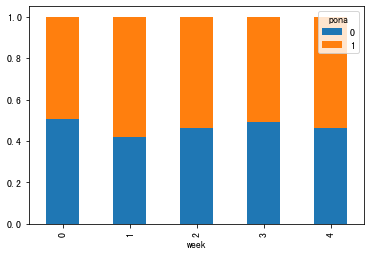

In [97]:
data.div(data.sum(axis=1), axis=0).plot(kind="bar", stacked=True)

In [98]:
data.div(data.sum(axis=1), axis=0)

pona,0,1
week,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


In [99]:
# 透视表操作 直接就能出比例结果
stock.pivot_table(["pona"], index=["week"])

,pona
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


#### 分类与聚合

In [100]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})


In [101]:
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [102]:
# 进行分组，对颜色分组，price1进行聚合
# 用dataframe的方法进行分组
col.groupby(by="color")["price1"].max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

In [103]:
col["price1"].groupby(col["color"]).max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64